# HW3-1: 1D compare to  logistic regression with SVM on simple case

- The code in this notebook was generated using [GitHub Copilot](https://github.com/features/copilot).

## Prompt
Generate a Python script using the CRISP-DM process to perform logistic regression and SVM on a set of 300 randomly generated variables, and visualize the results. Follow these steps:

1. Business Understanding: 
    - Generate a brief Python docstring explaining the purpose of this script: to compare logistic regression and SVM models. Highlight that the script will evaluate each model’s performance in classifying a dataset generated with binary classes, and visualize the decision boundaries of both models.
2. Data Understanding: 
    - Generate a dataset of 300 samples, each with a single variable X(i).
    - Set the target Y(i) such that Y(i) = 1 if 500 < X(i) < 800, otherwise Y(i) = 0.
    - Plot the dataset to visualize the distribution of X and Y classes.
3. Data Preparation: 
    - Split the dataset into training and test sets.
    - Use an 80-20 split, with 80% of the data for training and 20% for testing.
    - Print the shape of the training and test sets to verify the split.
4. Modeling:
    - Create and train a logistic regression model on the training data.
    - Create and train an SVM model with a linear kernel on the same training data.
    - Ensure both models are fitted on the input variable X(i) and target Y(i).
5. Evaluation:
    - Use the trained logistic regression and SVM models to predict on the test set.
    - Print out the accuracy scores and confusion matrices for both models.
    - Plot the decision boundaries of each model alongside the test set to visualize model performance.
    - Use subplots to display the logistic regression and SVM decision boundaries side by side.
6. Deployment:
    - Create a Jupyter Notebook.

## Modify

1. Change the decision boundaries to be represented by dashed lines.
2. add Legend.

## Result

### Step 1: Business Understanding
- Compare the performance of logistic regression and SVM in classifying data with binary outcomes, visualizing decision boundaries for each model.

### Step 2: Data Understanding
- Generate a dataset where the target class Y depends on the range of X values. Visualize the distribution of generated data.

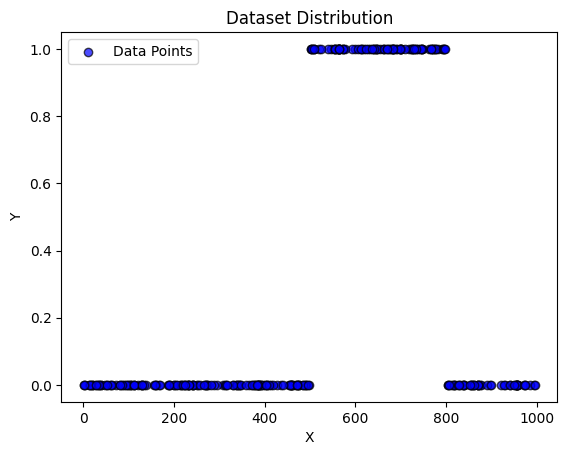

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


np.random.seed(42)
X = np.random.randint(0, 1000, 300).reshape(-1, 1)
Y = np.where((X > 500) & (X < 800), 1, 0).ravel()

# Plot the dataset
plt.scatter(X, Y, c='blue', edgecolors='k', alpha=0.7, label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset Distribution')
plt.legend()
plt.show()

### Step3: Data Preparation
- Split data into training and test sets with an 80-20 split for model training and evaluation.

In [26]:
# Data Preparation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f'Training set shape: {X_train.shape}, {Y_train.shape}')
print(f'Test set shape: {X_test.shape}, {Y_test.shape}')

Training set shape: (240, 1), (240,)
Test set shape: (60, 1), (60,)


### Step 4: Modeling
- Train a logistic regression model and an SVM model to classify the data based on training set.


In [27]:
# Modeling
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

svm_model = SVC()
svm_model.fit(X_train, Y_train)

SVC()

### Step 5: Evaluation
- Use test set to predict and evaluate the performance of each model.
- Print accuracy scores and confusion matrices, and visualize the decision boundaries.

Logistic Regression Accuracy: 0.6333333333333333


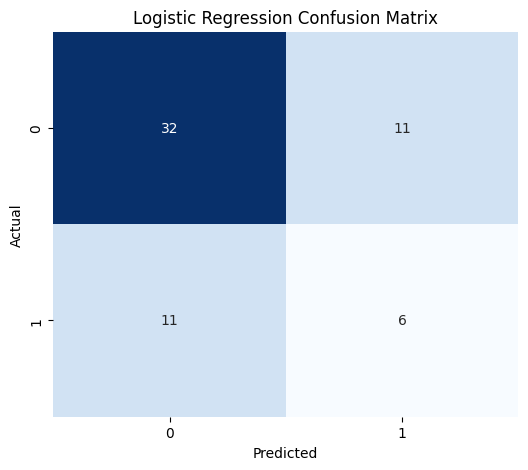

SVM Accuracy: 1.0


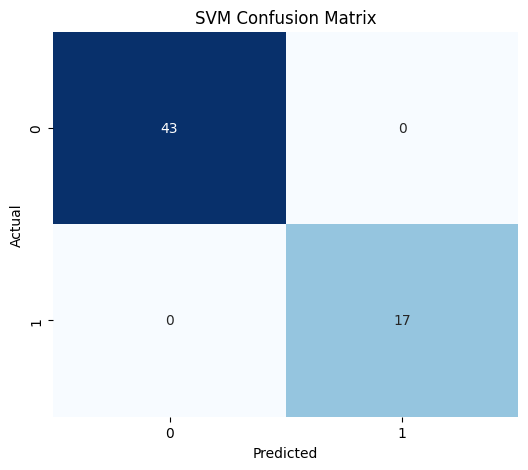

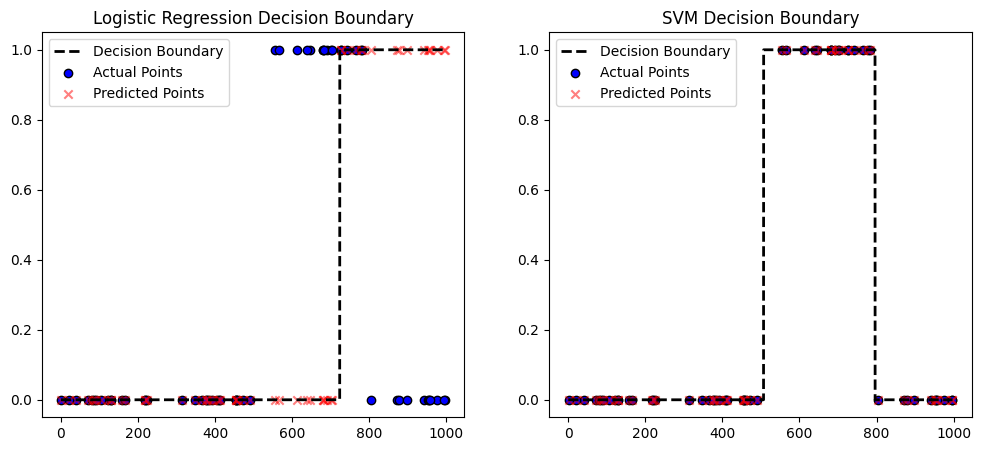

In [28]:
# Evaluation
Y_pred_log_reg = log_reg.predict(X_test)
Y_pred_svm = svm_model.predict(X_test)

print(f'Logistic Regression Accuracy: {accuracy_score(Y_test, Y_pred_log_reg)}')
cm_log_reg = confusion_matrix(Y_test, Y_pred_log_reg)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f'SVM Accuracy: {accuracy_score(Y_test, Y_pred_svm)}')
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot decision boundaries
def plot_decision_boundary(model, X, Y, ax, title):
    x_min, x_max = X.min() - 1, X.max() + 1
    xx = np.arange(x_min, x_max, 0.01).reshape(-1, 1)
    Z = model.predict(xx)
    pred = model.predict(X)
    ax.plot(xx, Z, color='black', linewidth=2, linestyle='--', label='Decision Boundary')
    ax.scatter(X, Y, c='blue', marker='o', edgecolor='k', label='Actual Points')
    ax.scatter(X, pred, c='red', marker='x', alpha=0.5, label='Predicted Points')
    ax.set_title(title)
    ax.legend()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(log_reg, X_test, Y_test, ax1, 'Logistic Regression Decision Boundary')
plot_decision_boundary(svm_model, X_test, Y_test, ax2, 'SVM Decision Boundary')
plt.show()

### Step 6: Deployment
- This part is presented within Jupyter Notebook.